# Statistical inference I - Estimation and confidence intervals

In a study on tobacco consumption during pregnancy, a sample of pregnant women was interviewed to gather information about their smoking habits as well as sociodemographic information. Physical parameters of the mothers and newborns were also collected.

The data can be found in the data folder <code>pesonac_tab.csv</code>. The variables in the dataset are:

- nserie: mother's identifier
- age: mother's age
- tabaco: smoker or non-smoker
- tbco2: number of cigarettes consumed during pregnancy
- socon2: Educational level achieved
- socon3: employment status
- tgr: gestational age at birth in weeks
- sex: gender of the newborn
- pn: weight of the newborn
- pm: mother's weight
- tm: mother's height
- tp: father's height
- tn: newborn's height


The primary goal of this study is to evaluate the influence of smoking and the physical and sociological characteristics of the mother on the newborn's health. Specifically, the "Weight of the newborn" and the "gestational age" can be considered as study variables, while the other variables can be seen as explanatory.

In [1]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/pesonac_tab.csv").drop(columns=["Unnamed: 0.1","Unnamed: 0"])
df.head()

,nserie,age,tabco2,socon2,socon3,tgr,sex,pn,pm,tm,tp,tn,tabaco
0,3,29,0,University studies,Employed,40,Male,3200,70.0,175,183,51,No
1,5,35,0,University studies,Employed,42,Female,3800,64.0,162,0,520,No
2,9,29,0,University studies,Unemployed,37,Female,3200,67.0,164,174,500,No
3,10,28,0,Primary studies,Unemployed,40,Male,4400,84.0,0,0,555,No
4,11,28,6,Secondary studies,Employed,39,Male,3050,81.0,161,175,500,Si


# Excercise 1

Find a confidence interval for the average weight of the newborn with a 90% confidence level for:

- **a) Smoker Women**

In [3]:
smoker_data = df['pn'][df['tabaco'] == "Si"]
confidence_interval_smoker = stats.t.interval(0.9, len(smoker_data)-1, loc=smoker_data.mean(), scale=smoker_data.sem())


print(f"Confidence Interval for smoker women:\n{confidence_interval_smoker[0]} - {confidence_interval_smoker[1]}")

Confidence Interval for smoker women:
3090.8111898960437 - 3230.5320936860458


- **b) Non-Smoker Women**

In [4]:
nonsmoker_data = df['pn'][df['tabaco'] == "No"]
confidence_interval_nonsmoker = stats.t.interval(0.9, len(nonsmoker_data)-1, loc=nonsmoker_data.mean(), scale=nonsmoker_data.sem())


print(f"Confidence Interval for non-smoker:\n{confidence_interval_nonsmoker[0]} - {confidence_interval_nonsmoker[1]}")

Confidence Interval for non-smoker:
3281.3227100349654 - 3371.854185271894


- **What conclusion can we draw about the birth weight depending on whether the mother was a smoker or not? (especially focus on the means and confidence intervals).**

In [5]:
general_mean = df['pn'].mean()

confidence_interval_smoker, confidence_interval_nonsmoker, general_mean

((3090.8111898960437, 3230.5320936860458),
 (3281.3227100349654, 3371.854185271894),
 3272.493917274939)

**INSIGHTS**

We can observe that the confidence interval for the birth weight of babies born to smoking mothers is below the general average and the confidence interval of non-smoking mothers. In other words, we can conclude that the newborn's weight is lower in women who smoked during pregnancy.

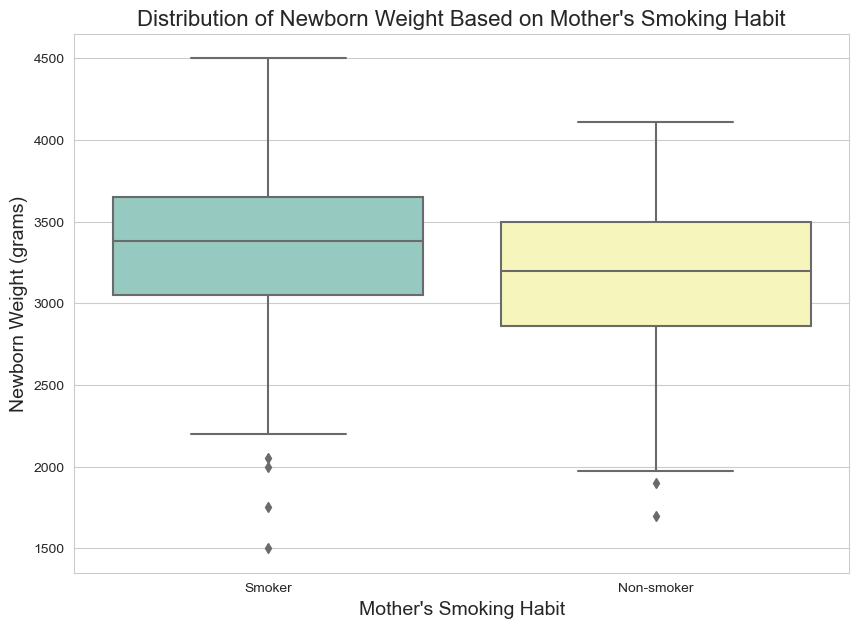

In [6]:
# Visualization
sns.set_style("whitegrid")

plt.figure(figsize=(10, 7))
sns.boxplot(x="tabaco", y="pn", data=df, palette="Set3")

plt.title("Distribution of Newborn Weight Based on Mother's Smoking Habit", fontsize=16)
plt.xlabel("Mother's Smoking Habit", fontsize=14)
plt.ylabel("Newborn Weight (grams)", fontsize=14)
plt.xticks([0, 1], ["Smoker", "Non-smoker"])
plt.show()

# Excercise 2

Now, we want to study the proportion of newborns with a weight less than 3000 grams

- **a) Calculate a 95% confidence interval for this proportion**

In [7]:
# Count the number of newborns with a weight less than 3000 grams
len3000 = sum(df['pn'] < 3000)

# Count the total number of newborns
len_total = len(df)

# Calculate the proportion of newborns weighing less than 3000 grams
prop = len3000 / len_total

# Calculate the z-value for a 95% confidence level
z = stats.norm.ppf(1 - (1-0.95)/2)

# Calculate the margin of error using the formula for proportions
margin_of_error = z * math.sqrt(prop * (1 - prop) / len_total)

# Determine the confidence interval by adding and subtracting the margin of error from the proportion
conf_interval = (prop - margin_of_error, prop + margin_of_error)

# Output confidence interval
conf_interval

(0.2041197141697544, 0.2873644707450874)

- **b) If we want to calculate the confidence interval as in the previous section (95%) but with a margin of error less than 0.02, determine the minimum sample size required, using the sample from the previous section as prior information.**

In [8]:
# Define the desired margin of error
desired_margin_of_error = 0.02

# Use the formula to calculate the required sample size based on the desired margin of error
required_sample_size = (z**2 * prop * (1 - prop)) / desired_margin_of_error**2

# Output the confidence interval and the required sample size
print(f"Confidence interval: {conf_interval}\nRequired sample size: {required_sample_size}")

Confidence interval: (0.2041197141697544, 0.2873644707450874)
Required sample size: 1780.0639896154573


# Excercise 3

Researchers believe that, regardless of whether the mother smokes or not, the gestational age at birth is more than 39 weeks. The person who conducted the analysis did not specify the R code for the test correctly and performed the following:

- **a) From the confidence interval, can we conclude that the mean is greater than 39? And with the p-value? Explain your answer.**

The confidence interval does not include 39, so we can reject the null hypothesis. This means we have evidence to suggest that the mean is more than 39 weeks. If we observe the p-value, we cannot come to any conclusion because it depends on the definition of the mean (mu) and the sidedness of the test. In this case, since it has not been correctly defined, we cannot make any conclusions based on the p-value.


- **b) How many patients were in the sample?**

In [9]:
total_patients = df.shape[0]

print(f"Total patients: {total_patients}")

Total patients: 411
